In [22]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
from holoviews import opts
import panel as pn
pn.extension()
hv.extension('bokeh')
import geopandas as gpd
from shapely.geometry import Point
import folium
import branca.colormap as cm
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# Define the folder path and file name
data_csv_file="data/commute/CSVLog_20240822_144757.CSV"

output_folder_path = 'output/date/analysis_20240822_pm/'  # Change this to your folder path

df_file_name = "df.csv"
df_file_path = os.path.join(output_folder_path, df_file_name)
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
#create folder folder if it does not exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

In [24]:
df=pd.read_csv(data_csv_file)
df.columns = df.columns.str.strip()
df_file_path = os.path.join(output_folder_path, df_file_name)
df.to_csv(df_file_path, index=False)
#df.head()

In [25]:
column_list=df.columns.tolist()
print(column_list)

['Time (sec)', 'Instant fuel economy (MPG)', 'Calculated load value (%)', 'Engine coolant temperature (°F)', 'Intake manifold absolute pressure (inHg)', 'Engine RPM (RPM)', 'Vehicle speed (MPH)', 'Relative throttle position (%)', 'Ambient air temperature (°F)', 'Relative accelerator pedal position (%)', 'Engine oil temperature (°F)', 'Intake air temperature bank 1  sensor 1 (°F)', 'Mass air flow rate (lb/min)', 'Boost (psi)', 'Engine Power (hp)', 'Engine Torque (lb•ft)', 'Trip Distance (miles)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)']


In [26]:
df=df[['Time (sec)', 'Vehicle speed (MPH)', 'Relative accelerator pedal position (%)','Engine RPM (RPM)', 'Boost (psi)', 'Engine Power (hp)','Mass air flow rate (lb/min)','Intake manifold absolute pressure (inHg)', 'Ambient air temperature (°F)','Trip Distance (miles)','Instant fuel economy (MPG)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)','Relative throttle position (%)']]
df.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg),Relative throttle position (%)
0,0.000,0.000000,0.000000,0.00,0.000000,9.49860,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.860565,-93.341880,0.00000
1,0.971,0.000000,0.000000,0.00,0.000000,9.49860,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.860565,-93.341890,0.00000
2,1.971,0.000000,0.000000,0.00,0.000000,9.49860,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.860565,-93.341890,0.00000
3,4.974,1.864114,3.137255,1672.25,-2.030528,9.58649,1.504374,25.691187,69.8,0.001861,2.666155,1.836173,44.860527,-93.341896,6.27451
4,5.959,1.864114,3.137255,1672.25,-2.030528,9.58649,1.504374,25.691187,69.8,0.001861,2.666155,1.836173,44.860490,-93.341900,6.27451


In [27]:
# To avoid math errors in situations where values = 0
df['Boost (psi)'] = df['Boost (psi)'].bfill().infer_objects()
df.loc[df['Boost (psi)'] == 0, 'Boost (psi)'] = 0.01

df.head()


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg),Relative throttle position (%)
0,0.000,0.000000,0.000000,0.00,0.010000,9.49860,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.860565,-93.341880,0.00000
1,0.971,0.000000,0.000000,0.00,0.010000,9.49860,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.860565,-93.341890,0.00000
2,1.971,0.000000,0.000000,0.00,0.010000,9.49860,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.860565,-93.341890,0.00000
3,4.974,1.864114,3.137255,1672.25,-2.030528,9.58649,1.504374,25.691187,69.8,0.001861,2.666155,1.836173,44.860527,-93.341896,6.27451
4,5.959,1.864114,3.137255,1672.25,-2.030528,9.58649,1.504374,25.691187,69.8,0.001861,2.666155,1.836173,44.860490,-93.341900,6.27451


In [28]:
def clean_data(df):
    # Round columns 'Time (sec)', ' Engine RPM (RPM)' and 2 other columns (Number of decimals: 0)
    df = df.round({'Time (sec)': 0, 'Engine RPM (RPM)': 0, 'Engine Power (hp)': 0, 'Time (sec)': 0})
    # Round columns ' Instant fuel economy (MPG)', ' Vehicle speed (MPH)' and 4 other columns (Number of decimals: 1)
    df = df.round({'Instant fuel economy (MPG)': 1, 'Vehicle speed (MPH)': 1,'Relative throttle position (%)': 1, 'Relative accelerator pedal position (%)': 1, 'Trip Distance (miles)': 1, 'Trip Fuel Economy (MPG)': 1,'Boost (psi)':1})
    # Round columns ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)', ' Bearing (deg)' (Number of decimals: 2)
    df = df.round({'Intake manifold absolute pressure (inHg)': 2, 'Mass air flow rate (lb/min)': 2,'Bearing (deg)': 2})
    # Drop columns: ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)' and 3 other columns
    df = df.drop(columns=['Relative throttle position (%)'])
    # Rename column 'Latitude (deg)' to 'latitude'
    df = df.rename(columns={'Latitude (deg)': 'latitude'})
    # Rename column 'Longitude (deg)' to 'longitude'
    df = df.rename(columns={'Longitude (deg)': 'longitude'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.00,0.0,0.0,0.0,0.0,44.860565,-93.341880
1,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.00,0.0,0.0,0.0,0.0,44.860565,-93.341890
2,2.0,0.0,0.0,0.0,0.0,9.0,0.0,0.00,0.0,0.0,0.0,0.0,44.860565,-93.341890
3,5.0,1.9,3.1,1672.0,-2.0,10.0,1.5,25.69,69.8,0.0,2.7,1.8,44.860527,-93.341896
4,6.0,1.9,3.1,1672.0,-2.0,10.0,1.5,25.69,69.8,0.0,2.7,1.8,44.860490,-93.341900


In [29]:
#create dataframe where vehicle is stationary
df_stationary = df_clean[df_clean['Vehicle speed (MPH)'] == 0]
df_stationary.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
0,0.0,0.0,0.0,0.0,0.0,9.0,0.00,0.00,0.0,0.0,0.0,0.0,44.860565,-93.34188
1,1.0,0.0,0.0,0.0,0.0,9.0,0.00,0.00,0.0,0.0,0.0,0.0,44.860565,-93.34189
2,2.0,0.0,0.0,0.0,0.0,9.0,0.00,0.00,0.0,0.0,0.0,0.0,44.860565,-93.34189
84,86.0,0.0,0.0,768.0,-9.0,5.0,0.49,11.52,68.0,0.4,0.0,13.2,44.862630,-93.34658
85,87.0,0.0,0.0,768.0,-8.8,5.0,0.52,11.81,68.0,0.4,0.0,13.2,44.862630,-93.34659


In [30]:
#creates dataframe where the vehicle is moving or is about to begin motion after being stationary
df_clean['next_mph'] = df_clean['Vehicle speed (MPH)'].shift(-1)
mask = (df_clean['Vehicle speed (MPH)'] > 0) | ((df_clean['Vehicle speed (MPH)'] == 0) & (df_clean['next_mph'] > 0))
df_moving= df_clean[mask].drop(columns=['next_mph'])
df_moving.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
2,2.0,0.0,0.0,0.0,0.0,9.0,0.00,0.00,0.0,0.0,0.0,0.0,44.860565,-93.341890
3,5.0,1.9,3.1,1672.0,-2.0,10.0,1.50,25.69,69.8,0.0,2.7,1.8,44.860527,-93.341896
4,6.0,1.9,3.1,1672.0,-2.0,10.0,1.50,25.69,69.8,0.0,2.7,1.8,44.860490,-93.341900
5,7.0,1.9,3.1,1672.0,-2.0,10.0,1.50,25.69,69.8,0.0,2.7,1.8,44.860455,-93.341934
6,8.0,7.5,5.1,1893.0,-5.2,24.0,1.85,19.19,69.8,0.0,4.2,3.2,44.860424,-93.341970


In [31]:
#experimenting 
df_moving['Mass Air/Boost']=df_moving['Mass air flow rate (lb/min)']/df_moving['Boost (psi)']
df_moving['Mass Air/manPress']=df_moving['Mass air flow rate (lb/min)']/df_moving['Intake manifold absolute pressure (inHg)']
df_moving.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
2,2.0,0.0,0.0,0.0,0.0,9.0,0.00,0.00,0.0,0.0,0.0,0.0,44.860565,-93.341890,NaN,NaN
3,5.0,1.9,3.1,1672.0,-2.0,10.0,1.50,25.69,69.8,0.0,2.7,1.8,44.860527,-93.341896,-0.750000,0.058388
4,6.0,1.9,3.1,1672.0,-2.0,10.0,1.50,25.69,69.8,0.0,2.7,1.8,44.860490,-93.341900,-0.750000,0.058388
5,7.0,1.9,3.1,1672.0,-2.0,10.0,1.50,25.69,69.8,0.0,2.7,1.8,44.860455,-93.341934,-0.750000,0.058388
6,8.0,7.5,5.1,1893.0,-5.2,24.0,1.85,19.19,69.8,0.0,4.2,3.2,44.860424,-93.341970,-0.355769,0.096404


In [32]:
#creates dataframe where vehicle is moving and speed is less than 10mph
mask = (df_moving['Vehicle speed (MPH)'] <= 10)
df_less_10 = df_moving[mask]
#df_less_10.head()
df_less_10.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,465.000000,465.000000
mean,1064.137339,6.152790,2.809442,1166.583691,-8.556652,9.203863,0.796352,12.075579,67.900429,6.766309,14.332403,16.190558,44.875011,-93.253499,-0.203072,0.064051
std,742.060307,2.586733,4.452221,416.795701,3.128483,9.388352,0.608460,6.354032,3.165085,7.424974,9.277963,3.376426,0.044315,0.107041,0.610879,0.020457
min,2.000000,0.000000,0.000000,0.000000,-11.900000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.857796,-93.351730,-5.275000,0.032986
25%,426.250000,4.300000,0.000000,840.000000,-10.675000,4.000000,0.430000,7.752500,68.000000,1.500000,6.700000,12.600000,44.861640,-93.345640,-0.102299,0.048177
50%,1114.500000,6.200000,0.000000,1067.000000,-9.700000,5.000000,0.550000,9.740000,68.000000,6.200000,13.200000,17.400000,44.862106,-93.255378,-0.059223,0.059677
75%,1262.750000,8.700000,5.100000,1383.250000,-7.800000,9.000000,0.910000,13.580000,68.000000,6.400000,19.675000,17.875000,44.862120,-93.249580,-0.041818,0.072758
max,3342.000000,9.900000,29.400000,2900.000000,6.700000,80.000000,5.830000,43.110000,69.800000,32.200000,39.000000,21.900000,45.058098,-92.947495,5.916667,0.135440


In [33]:
#creates dataframe where vehicle is moving and speed is between 10 and 20mph
mask = (df_moving['Vehicle speed (MPH)'] >= 10) & (df_moving['Vehicle speed (MPH)'] <= 20)
df_10_20 = df_moving[mask]
#df_10_20.head()
df_10_20.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,1390.657576,14.423788,2.384242,1498.974242,-8.534394,13.310606,1.149121,12.180288,68.079091,10.657273,27.884697,17.549697,44.895250,-93.192571,inf,0.087861
std,942.123312,2.804640,3.948857,423.468080,3.738953,13.875849,0.967012,7.621799,0.369208,10.051904,17.655964,3.284084,0.059086,0.146036,NaN,0.023392
min,10.000000,10.600000,0.000000,752.000000,-12.000000,3.000000,0.300000,5.020000,68.000000,0.000000,2.100000,6.100000,44.857790,-93.351700,-40.600000,0.043360
25%,857.750000,11.800000,0.000000,1175.750000,-11.200000,5.000000,0.480000,6.790000,68.000000,5.300000,11.475000,17.300000,44.862029,-93.274273,-0.169738,0.069519
50%,1066.500000,13.700000,0.000000,1435.000000,-10.300000,7.000000,0.775000,8.560000,68.000000,6.000000,27.600000,17.900000,44.862114,-93.258450,-0.068627,0.085259
75%,2470.250000,16.800000,4.300000,1740.000000,-6.500000,17.000000,1.512500,16.240000,68.000000,23.500000,39.050000,20.600000,44.940357,-92.960590,-0.040484,0.102128
max,3334.000000,19.900000,23.900000,3019.000000,5.700000,113.000000,7.910000,41.050000,69.800000,32.200000,76.400000,21.900000,45.058050,-92.947495,inf,0.199899


In [34]:
#creates dataframe where vehicle is moving and speed is between 20 and 30mph
mask = (df_moving['Vehicle speed (MPH)'] >= 20) & (df_moving['Vehicle speed (MPH)'] <= 30)
df_20_30 = df_moving[mask]
#df_20_30.head()
df_20_30.describe()


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,1889.581006,25.217877,3.618994,1592.918994,-7.622905,16.240223,1.403045,14.014134,68.045251,15.893855,42.982402,18.016480,44.929875,-93.123312,inf,0.094292
std,1087.090632,2.834079,5.337136,325.330750,4.626126,15.566010,1.136553,9.424324,0.282183,12.032806,29.027806,3.869797,0.075113,0.169259,NaN,0.019551
min,30.000000,20.500000,0.000000,878.000000,-12.200000,3.000000,0.370000,4.720000,68.000000,0.100000,3.700000,9.100000,44.858383,-93.351760,-43.700000,0.069111
25%,951.250000,23.000000,0.000000,1310.500000,-11.300000,5.000000,0.530000,6.500000,68.000000,5.600000,15.025000,17.100000,44.862065,-93.266894,-0.212473,0.076823
50%,1512.500000,25.500000,0.000000,1545.000000,-9.900000,9.000000,0.925000,9.450000,68.000000,7.550000,38.150000,17.900000,44.865209,-93.226125,-0.063794,0.090546
75%,2854.750000,27.300000,7.800000,1826.250000,-4.600000,22.000000,2.007500,20.080000,68.000000,27.000000,66.150000,21.100000,44.991733,-92.959015,-0.040787,0.107524
max,3332.000000,29.800000,24.300000,2936.000000,5.900000,83.000000,6.480000,41.640000,69.800000,32.200000,113.800000,21.900000,45.057930,-92.947495,inf,0.174147


In [35]:
#creates dataframe where vehicle is moving and speed is between 30 and 40mph
mask = (df_moving['Vehicle speed (MPH)'] >= 30) & (df_moving['Vehicle speed (MPH)'] <= 40)
df_30_40 = df_moving[mask]
#df_30_40.head()
df_30_40.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.0,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,1706.199301,34.919231,4.487063,1730.213287,-6.575175,20.730769,1.719685,16.122133,68.0,14.648951,53.992657,17.481818,44.923594,-93.141517,inf,0.100360
std,1147.327790,2.881730,6.392063,344.452293,5.327227,20.647949,1.330010,10.862134,0.0,12.208208,41.919230,4.017805,0.069256,0.181903,NaN,0.019838
min,55.000000,30.400000,0.000000,1250.000000,-12.200000,4.000000,0.370000,4.720000,68.0,0.200000,4.200000,9.000000,44.857933,-93.351140,-29.500000,0.071932
25%,523.250000,32.300000,0.000000,1381.000000,-11.500000,5.000000,0.550000,6.200000,68.0,2.200000,15.600000,13.600000,44.861482,-93.337153,-0.259389,0.082060
50%,1532.500000,34.800000,0.000000,1748.500000,-8.200000,12.000000,1.210000,12.550000,68.0,7.700000,38.400000,17.800000,44.864254,-93.222223,-0.058750,0.101578
75%,2858.750000,37.300000,9.000000,1920.500000,-2.300000,29.000000,2.630000,24.735000,68.0,27.000000,89.650000,21.100000,44.992294,-92.958751,-0.034188,0.110544
max,3309.000000,39.800000,48.200000,3091.000000,8.000000,121.000000,5.950000,45.770000,68.0,32.000000,150.300000,21.900000,45.057144,-92.947495,inf,0.176677


In [36]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 40) & (df_moving['Vehicle speed (MPH)'] <= 50)
df_40_50 = df_moving[mask]
#df_40_50.head()
df_40_50.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.0,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1521.570122,44.680488,5.142988,1792.923780,-5.940549,22.762195,1.884878,17.420518,68.0,12.527744,59.876220,17.622561,44.902794,-93.166198,inf,0.103766
std,1031.579061,2.819219,6.261328,315.955234,5.408989,20.381638,1.344410,11.030329,0.0,10.855667,49.130459,3.140382,0.064993,0.164668,NaN,0.018159
min,323.000000,40.400000,0.000000,1278.000000,-12.000000,4.000000,0.380000,5.020000,68.0,1.000000,5.400000,10.500000,44.857930,-93.350334,-10.166667,0.074866
25%,599.750000,42.300000,0.000000,1515.000000,-11.000000,6.000000,0.660000,7.090000,68.0,3.000000,16.500000,15.500000,44.861542,-93.319788,-0.344828,0.087969
50%,726.500000,44.700000,0.400000,1821.500000,-7.000000,15.000000,1.660000,15.360000,68.0,4.600000,39.750000,17.050000,44.862157,-93.288285,-0.075767,0.105174
75%,2609.250000,46.600000,10.600000,1994.500000,-1.500000,37.000000,2.745000,26.580000,68.0,24.400000,94.525000,20.500000,44.952994,-92.959980,-0.036075,0.114926
max,3238.000000,49.700000,27.100000,3046.000000,12.600000,117.000000,8.650000,55.220000,68.0,31.600000,168.000000,21.800000,45.054832,-92.947500,inf,0.175744


In [37]:
mask = (df_moving['Vehicle speed (MPH)'] >= 50) & (df_moving['Vehicle speed (MPH)'] <= 60)
df_50_60 = df_moving[mask]
df_50_60.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.00000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2478.160671,55.298801,6.037170,1837.095923,-4.456115,26.055156,2.220504,20.447650,68.0,22.32518,58.064508,20.342926,44.954160,-93.019757,inf,0.106055
std,695.299593,2.628491,6.412865,222.174558,5.736499,21.067755,1.434396,11.689357,0.0,8.24474,48.145669,1.423871,0.073774,0.099929,NaN,0.012699
min,713.000000,50.300000,0.000000,1528.000000,-12.000000,4.000000,0.450000,5.020000,68.0,4.40000,7.100000,17.000000,44.861810,-93.292520,-37.800000,0.088710
25%,2073.000000,53.400000,0.000000,1703.000000,-10.000000,8.000000,0.990000,9.150000,68.0,17.00000,20.200000,19.900000,44.874770,-93.043820,-0.375926,0.098139
50%,2642.000000,55.300000,5.100000,1770.000000,-4.800000,19.000000,2.060000,19.490000,68.0,24.80000,39.500000,20.500000,44.959950,-92.959630,-0.084000,0.102709
75%,3057.000000,57.200000,10.600000,1904.000000,0.100000,37.000000,3.070000,29.830000,68.0,29.30000,94.000000,21.500000,45.025024,-92.958210,0.744828,0.109983
max,3224.000000,59.700000,31.800000,2911.000000,10.600000,107.000000,8.680000,51.090000,68.0,31.40000,165.400000,21.700000,45.052288,-92.947520,inf,0.181438


In [38]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 60) & (df_moving['Vehicle speed (MPH)'] <= 70)
df_60_70 = df_moving[mask]
#df_60_70.head()
df_60_70.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,682.000000,682.00000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.0,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,2017.721408,64.88783,8.877713,2082.410557,-0.712170,41.252199,3.410220,28.092654,68.0,15.936364,36.810411,19.261877,44.885310,-93.073087,inf,0.120178
std,321.952877,2.43943,6.466539,132.638662,5.855049,24.565912,1.533596,11.928053,0.0,5.183122,33.930515,1.042284,0.032303,0.082963,NaN,0.007682
min,1570.000000,60.30000,0.000000,1794.000000,-11.700000,6.000000,0.630000,5.610000,68.0,8.300000,7.600000,17.400000,44.859320,-93.210710,-36.700000,0.104839
25%,1740.250000,63.40000,1.700000,1988.000000,-4.800000,21.000000,2.332500,19.790000,68.0,11.400000,15.000000,18.300000,44.861739,-93.147551,-0.511487,0.114947
50%,1910.500000,65.20000,9.600000,2072.500000,-0.100000,39.000000,3.415000,29.230000,68.0,14.500000,22.900000,18.850000,44.865323,-93.088240,-0.056278,0.119539
75%,2279.750000,66.50000,13.700000,2170.750000,3.300000,59.000000,4.430000,36.545000,68.0,20.500000,42.425000,20.300000,44.903591,-92.992600,1.251457,0.124948
max,2707.000000,69.60000,32.900000,2660.000000,11.600000,121.000000,7.930000,53.150000,68.0,26.000000,144.700000,20.800000,44.976350,-92.958200,inf,0.160025


In [39]:
mask = (df_moving['Vehicle speed (MPH)'] >= 70)
df_grt_70 = df_moving[mask]
#df_grt_70.head()
df_grt_70.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2188.472222,70.591667,5.888889,2193.277778,-2.497222,34.055556,3.092778,24.320833,68.0,19.094444,43.536111,19.647222,44.898750,-93.016831,inf,0.126780
std,207.705903,0.402403,5.314550,49.824040,5.225240,21.109164,1.380353,10.675886,0.0,3.447645,30.415702,0.713337,0.025816,0.053047,NaN,0.002560
min,1915.000000,70.200000,0.000000,2108.000000,-11.600000,7.000000,0.690000,5.610000,68.0,14.600000,12.600000,18.600000,44.866290,-93.087090,-9.125000,0.122587
25%,1926.750000,70.200000,0.000000,2159.500000,-6.125000,18.000000,2.100000,16.830000,68.0,14.800000,20.375000,18.700000,44.868998,-93.084294,-0.651786,0.124777
50%,2256.500000,70.800000,7.100000,2186.000000,-3.400000,26.000000,2.795000,22.440000,68.0,20.000000,37.200000,20.100000,44.897900,-92.996252,-0.314587,0.126515
75%,2387.250000,70.800000,9.300000,2236.750000,0.375000,47.250000,3.757500,30.047500,68.0,22.500000,54.800000,20.200000,44.926833,-92.967568,0.754185,0.128431
max,2396.000000,71.500000,16.900000,2287.000000,8.400000,76.000000,6.080000,46.660000,68.0,22.600000,139.600000,20.300000,44.928820,-92.965410,inf,0.131988


In [40]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 55) & (df_moving['Vehicle speed (MPH)'] <= 75)
df_55_75 = df_moving[mask]
#df_55_75.head()
df_55_75.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.0,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,2110.812565,63.198743,8.028901,2030.215707,-1.686283,37.179058,3.113717,26.097288,68.0,17.274869,42.641675,19.492880,44.898410,-93.060012,inf,0.117273
std,445.541483,4.216775,6.494347,174.136045,6.035073,24.537234,1.587194,12.299630,0.0,6.275475,38.879713,1.193427,0.049578,0.088316,NaN,0.010179
min,723.000000,55.300000,0.000000,1656.000000,-11.900000,5.000000,0.520000,5.320000,68.0,4.500000,7.100000,17.100000,44.859320,-93.289470,-37.800000,0.096257
25%,1773.500000,60.300000,0.000000,1912.000000,-6.200000,17.000000,1.935000,16.830000,68.0,12.000000,16.100000,18.400000,44.862363,-93.135152,-0.487222,0.110313
50%,2101.000000,64.000000,8.600000,2042.000000,-1.200000,33.000000,3.080000,27.170000,68.0,17.400000,26.100000,20.100000,44.875190,-93.034935,-0.060177,0.117710
75%,2343.500000,65.900000,12.900000,2157.500000,2.800000,54.000000,4.145000,35.140000,68.0,21.600000,49.200000,20.400000,44.917185,-92.977987,1.114286,0.124260
max,3189.000000,71.500000,32.900000,2660.000000,11.600000,121.000000,8.680000,53.150000,68.0,30.900000,155.800000,21.600000,45.045197,-92.950200,inf,0.181438


40-50mph
Average Boost: -5.94
Value Counts: 328
Values > 100mpg: 76
Values <= 100mpg: 252
Percent above 100mpg: 23.17%
Mean MPG: 59.88
mpg Quartiles
   Percentile  40-50mph (mpg)
0        0.25          16.500
1        0.50          39.750
2        0.75          94.525
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -11.0
1        0.50         -7.0
2        0.75         -1.5


<Axes: ylabel='Value (psi)'>

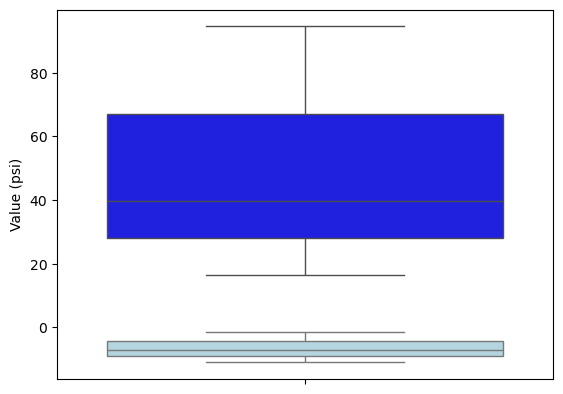

In [41]:
mask_grt_100 = df_40_50['Instant fuel economy (MPG)'] > 100
mpg_grt_100_40_50 = mask_grt_100.sum()
mask_lte_100 = df_40_50['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_40_50 = mask_lte_100.sum()

mph_40_50_boost_mean =df_40_50['Boost (psi)'].mean().round(2) 
mph_40_50_boost_quantiles=df_40_50['Boost (psi)'].quantile([0.25,0.50,0.75])
df_40_50_boost_quantiles = pd.DataFrame(mph_40_50_boost_quantiles)
df_40_50_boost_quantiles = df_40_50_boost_quantiles.reset_index()
df_40_50_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_40_50_count=len(df_40_50)
mpg_40_50_mpg_mean=df_40_50['Instant fuel economy (MPG)'].mean().round(2)
mpg_40_50_100_quantiles=df_40_50['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_40_50_100_per=((mpg_grt_100_40_50/mpg_40_50_count)*100).round(2)
df_40_50_100_quantiles = pd.DataFrame(mpg_40_50_100_quantiles)
df_40_50_100_quantiles = df_40_50_100_quantiles.reset_index()
df_40_50_100_quantiles.columns = ['Percentile', '40-50mph (mpg)']

print("40-50mph")
print(f"Average Boost: {mph_40_50_boost_mean}")
print(f"Value Counts: {mpg_40_50_count}")
print(f"Values > 100mpg: {mpg_grt_100_40_50}")
print(f"Values <= 100mpg: {mpg_lte_100_40_50}")
print(f"Percent above 100mpg: {mpg_40_50_100_per}%")
print(f"Mean MPG: {mpg_40_50_mpg_mean}")
print("mpg Quartiles")
print(df_40_50_100_quantiles)
print("Boost Quartiles")
print(df_40_50_boost_quantiles)
sns.boxplot(y=df_40_50_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_40_50_100_quantiles['40-50mph (mpg)'], color='blue')

50-60mph
Average Boost: -4.46
Value Counts: 417
Values > 100mpg: 93
Values <= 100mpg: 324
Percent above 100mpg: 22.3%
Mean MPG: 58.06
mpg Quartiles
   Percentile  50-60mph (mpg)
0        0.25            20.2
1        0.50            39.5
2        0.75            94.0
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -10.0
1        0.50         -4.8
2        0.75          0.1


<Axes: ylabel='Value (psi)'>

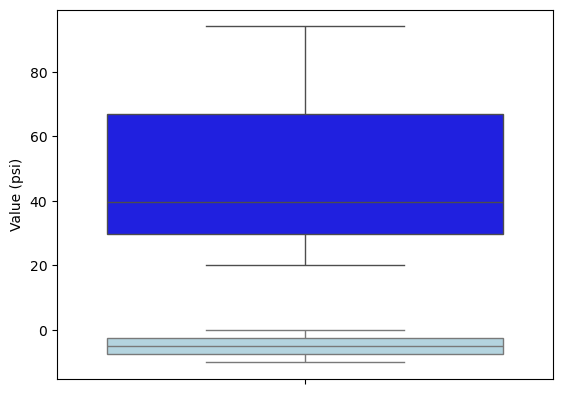

In [42]:
mask_grt_100 = df_50_60['Instant fuel economy (MPG)'] > 100
mpg_grt_100_50_60 = mask_grt_100.sum()
mask_lte_100 = df_50_60['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_50_60 = mask_lte_100.sum()

mph_50_60_boost_mean =df_50_60['Boost (psi)'].mean().round(2) 
mph_50_60_boost_quantiles=df_50_60['Boost (psi)'].quantile([0.25,0.50,0.75])
df_50_60_boost_quantiles = pd.DataFrame(mph_50_60_boost_quantiles)
df_50_60_boost_quantiles = df_50_60_boost_quantiles.reset_index()
df_50_60_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_50_60_count=len(df_50_60)
mpg_50_60_mpg_mean=df_50_60['Instant fuel economy (MPG)'].mean().round(2)
mpg_50_60_100_quantiles=df_50_60['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_50_60_100_per=((mpg_grt_100_50_60/mpg_50_60_count)*100).round(2)
df_50_60_100_quantiles = pd.DataFrame(mpg_50_60_100_quantiles)
df_50_60_100_quantiles = df_50_60_100_quantiles.reset_index()
df_50_60_100_quantiles.columns = ['Percentile', '50-60mph (mpg)']

print("50-60mph")
print(f"Average Boost: {mph_50_60_boost_mean}")
print(f"Value Counts: {mpg_50_60_count}")
print(f"Values > 100mpg: {mpg_grt_100_50_60}")
print(f"Values <= 100mpg: {mpg_lte_100_50_60}")
print(f"Percent above 100mpg: {mpg_50_60_100_per}%")
print(f"Mean MPG: {mpg_50_60_mpg_mean}")
print("mpg Quartiles")
print(df_50_60_100_quantiles)
print("Boost Quartiles")
print(df_50_60_boost_quantiles)
sns.boxplot(y=df_50_60_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_50_60_100_quantiles['50-60mph (mpg)'], color='blue')

60-70mph
Average Boost: -0.71
Value Counts: 682
Values > 100mpg: 62
Values <= 100mpg: 620
Percent above 100mpg: 9.09%
Mean MPG: 36.81
mpg Quartiles
   Percentile  60-70mph (mpg)
0        0.25          15.000
1        0.50          22.900
2        0.75          42.425
Boost Quartiles
   Percentile  Value (psi)
0        0.25         -4.8
1        0.50         -0.1
2        0.75          3.3


<Axes: ylabel='Value (psi)'>

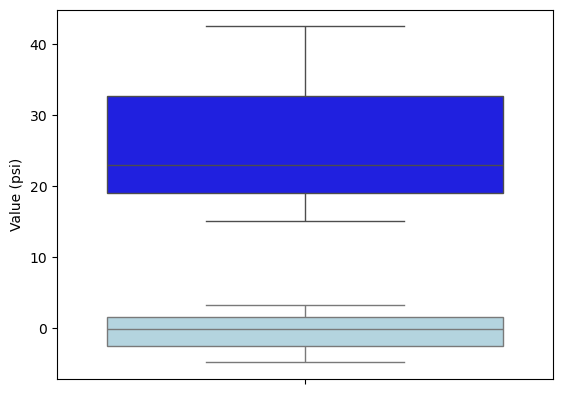

In [43]:
mask_grt_100 = df_60_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_60_70 = mask_grt_100.sum()
mask_lte_100 = df_60_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_60_70 = mask_lte_100.sum()

mph_60_70_boost_mean =df_60_70['Boost (psi)'].mean().round(2) 
mph_60_70_boost_quantiles=df_60_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_60_70_boost_quantiles = pd.DataFrame(mph_60_70_boost_quantiles)
df_60_70_boost_quantiles = df_60_70_boost_quantiles.reset_index()
df_60_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_60_70_count=len(df_60_70)
mpg_60_70_mpg_mean=df_60_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_60_70_100_quantiles=df_60_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_60_70_100_per=((mpg_grt_100_60_70/mpg_60_70_count)*100).round(2)
df_60_70_100_quantiles = pd.DataFrame(mpg_60_70_100_quantiles)
df_60_70_100_quantiles = df_60_70_100_quantiles.reset_index()
df_60_70_100_quantiles.columns = ['Percentile', '60-70mph (mpg)']

print("60-70mph")
print(f"Average Boost: {mph_60_70_boost_mean}")
print(f"Value Counts: {mpg_60_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_60_70}")
print(f"Values <= 100mpg: {mpg_lte_100_60_70}")
print(f"Percent above 100mpg: {mpg_60_70_100_per}%")
print(f"Mean MPG: {mpg_60_70_mpg_mean}")
print("mpg Quartiles")
print(df_60_70_100_quantiles)
print("Boost Quartiles")
print(df_60_70_boost_quantiles)
sns.boxplot(y=df_60_70_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_60_70_100_quantiles['60-70mph (mpg)'], color='blue')

Greater Than 70mph
Average Boost: -2.5
Value Counts: 36
Values > 100mpg: 2
Values <= 100mpg: 34
Percent above 100mpg: 5.56%
Mean MPG: 43.54
mpg Quartiles
   Percentile  Greater than 70mph (mpg)
0        0.25                    20.375
1        0.50                    37.200
2        0.75                    54.800
Boost Quartiles
   Percentile  Value (psi)
0        0.25       -6.125
1        0.50       -3.400
2        0.75        0.375


<Axes: ylabel='Greater than 70mph (mpg)'>

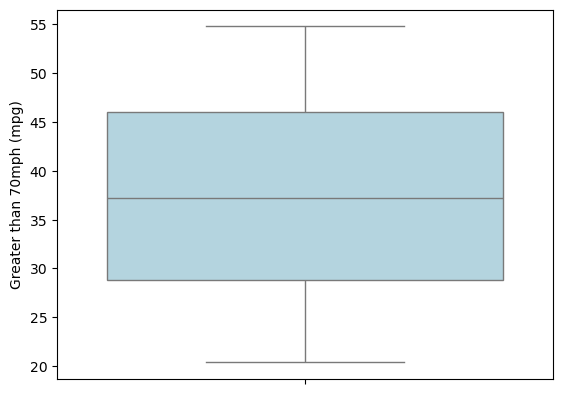

In [44]:
mask_grt_100 = df_grt_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_grt_70 = mask_grt_100.sum()
mask_lte_100 = df_grt_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_grt_70 = mask_lte_100.sum()

mph_grt_70_boost_mean =df_grt_70['Boost (psi)'].mean().round(2) 
mph_grt_70_boost_quantiles=df_grt_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_grt_70_boost_quantiles = pd.DataFrame(mph_grt_70_boost_quantiles)
df_grt_70_boost_quantiles = df_grt_70_boost_quantiles.reset_index()
df_grt_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_grt_70_count=len(df_grt_70)
mpg_grt_70_mpg_mean=df_grt_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_grt_70_100_quantiles=df_grt_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_grt_70_100_per=((mpg_grt_100_grt_70/mpg_grt_70_count)*100).round(2)
df_grt_70_100_quantiles = pd.DataFrame(mpg_grt_70_100_quantiles)
df_grt_70_100_quantiles = df_grt_70_100_quantiles.reset_index()
df_grt_70_100_quantiles.columns = ['Percentile', 'Greater than 70mph (mpg)']

print("Greater Than 70mph")
print(f"Average Boost: {mph_grt_70_boost_mean}")
print(f"Value Counts: {mpg_grt_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_grt_70}")
print(f"Values <= 100mpg: {mpg_lte_100_grt_70}")
print(f"Percent above 100mpg: {mpg_grt_70_100_per}%")
print(f"Mean MPG: {mpg_grt_70_mpg_mean}")
print("mpg Quartiles")
print(df_grt_70_100_quantiles)
print("Boost Quartiles")
print(df_grt_70_boost_quantiles)
sns.boxplot(y=df_grt_70_100_quantiles['Greater than 70mph (mpg)'], color='lightblue')

In [45]:
mpg_count_list=[mpg_40_50_count, mpg_50_60_count, mpg_60_70_count, mpg_grt_70_count]
mpg_lte_100_count_list = [int(mpg_lte_100_40_50), int(mpg_lte_100_50_60), int(mpg_lte_100_60_70), int(mpg_lte_100_grt_70)]
mpg_grt_100_count_list = [int(mpg_grt_100_40_50), int(mpg_grt_100_50_60), int(mpg_grt_100_60_70), int(mpg_grt_100_grt_70)]
mpg_grt_100_per_list=[int(mpg_40_50_100_per),int(mpg_50_60_100_per),int(mpg_60_70_100_per),int(mpg_grt_70_100_per)]

mpg_100_df = pd.DataFrame({
    'total mpg counts': mpg_count_list,
    'total mpg <= 100 counts': mpg_lte_100_count_list,
    'total mpg > 100 counts': mpg_grt_100_count_list,
    '% > 100mpg':mpg_grt_100_per_list
}, index=['40-50mph', '50-60mph', '60-70mph', '>70mph'])

print(f'total mpg counts: {mpg_count_list}')
print(f'total mpg <= 100 counts: {mpg_lte_100_count_list}')
print(f'total mpg > 100 counts: {mpg_grt_100_count_list}')
print(f'% > 100mpg : {mpg_grt_100_per_list}')
mpg_100_df.head()

total mpg counts: [328, 417, 682, 36]
total mpg <= 100 counts: [252, 324, 620, 34]
total mpg > 100 counts: [76, 93, 62, 2]
% > 100mpg : [23, 22, 9, 5]


,total mpg counts,total mpg <= 100 counts,total mpg > 100 counts,% > 100mpg
40-50mph,328,252,76,23
50-60mph,417,324,93,22
60-70mph,682,620,62,9
>70mph,36,34,2,5


   Percentile  40-50mph (mpg)  50-60mph (mpg)  60-70mph (mpg)  \
0        0.25          16.500            20.2          15.000   
1        0.50          39.750            39.5          22.900   
2        0.75          94.525            94.0          42.425   

   Greater than 70mph (mpg)  
0                    20.375  
1                    37.200  
2                    54.800  


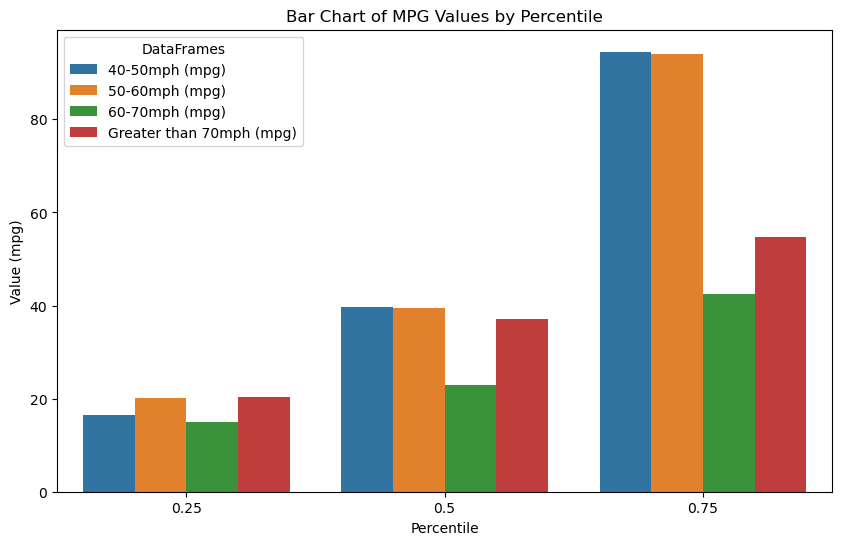

In [46]:
# Merge DataFrames on 'Percentile'
df_quartiles = pd.merge(df_40_50_100_quantiles, df_50_60_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_60_70_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_grt_70_100_quantiles, on='Percentile')
df_quartiles.head()
print(df_quartiles)

df_long = pd.melt(df_quartiles, id_vars='Percentile', var_name='DataFrame', value_name='Value (mpg)')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Percentile', y='Value (mpg)', hue='DataFrame')
plt.title('Bar Chart of MPG Values by Percentile')
plt.xlabel('Percentile')
plt.ylabel('Value (mpg)')
plt.legend(title='DataFrames')
mpg_by_mph_file_path = os.path.join(output_folder_path, 'mpg_by_mph.jpeg')
plt.savefig(mpg_by_mph_file_path, format='jpeg', dpi=300)
plt.show()

In [47]:
df
#convert 
#df_less_10_geo=df_less_10.copy()
#df_less_10_geo.head()
#
#df_10_20_geo = df_10_20.copy()
#df_10_20_geo.head()
#
#df_20_30_geo = df_20_30.copy()
#df_20_30_geo.head()
#
#df_30_40_geo = df_30_40.copy()
#df_30_40_geo.head()
#
#df_40_50_geo = df_40_50.copy()
#df_40_50_geo.head()
#
#df_50_60_geo = df_50_60.copy()
#
#
#df_60_70_geo = df_60_70.copy()

df_55_75_geo = df_55_75.copy()





In [48]:
#map_center = [df_60_70['latitude'].mean(), df_60_70['longitude'].mean()]
#print(map_center)

In [49]:
print("Available colormaps:")
for name in dir(cm):
    if 'colormap' in name.lower():
        print(name)

Available colormaps:
ColorMap
LinearColormap
StepColormap
_LinearColormaps
_StepColormaps


In [50]:
df_map=df_moving.copy()
map_center = [44.980164, -93.185692]
m = folium.Map(location=map_center, zoom_start=11)
coordinates = df_map[['latitude', 'longitude', 'Vehicle speed (MPH)']].values.tolist()
sorted_coordinates = sorted(coordinates, key=lambda x: x[2])
colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],  # Custom color range
    vmin=df_map['Vehicle speed (MPH)'].min(),
    vmax=df_map['Vehicle speed (MPH)'].max(),
    caption='Vehicle Speed (MPH)'   
)

colormap.add_to(m)



for i in range(len(df_map) - 1):
    # Coordinates of the current segment
    start = [df_map.iloc[i]['latitude'], df_map.iloc[i]['longitude']]
    end = [df_map.iloc[i + 1]['latitude'], df_map.iloc[i + 1]['longitude']]
    
    # Value for color mapping (use average or a specific value)
    segment_value = (df_map.iloc[i]['Vehicle speed (MPH)'] + df_map.iloc[i + 1]['Vehicle speed (MPH)']) / 2
    
    # Create and add a PolyLine for each segment
    folium.PolyLine(
        locations=[start, end],
        color=colormap(segment_value),  # Map value to color
        weight=5,
        opacity=1
        ).add_to(m)

# Save the map to an HTML file
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
m.save(map_moving_file_path)


In [51]:
#map_center = [44.980164, -93.185692]
#m = folium.Map(location=map_center, zoom_start=11)
#
#
## Prepare the list of coordinates for the PolyLine
#coordinates = df_55_75_geo[['latitude', 'longitude']].values.tolist()
#
## Add a PolyLine to the map
#folium.PolyLine(
#    locations=coordinates,
#    popup=[str(row['Time (sec)']) for idx, row in df_55_75_geo.iterrows()],
#    weight=5,
#    opacity=1,
#    color='blue'
#).add_to(m)

# Save the map to an HTML file
m.save('mpg_55_75_map.html')

In [52]:
hvexplorer = df.hvplot.explorer()
hvexplorer

/Users/matthewidle/anaconda3/envs/py311/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


BokehModel(combine_events=True, render_bundle={'docs_json': {'db16584a-2a2a-4f8d-8559-383b2bf826a1': {'version…

In [53]:
df['Engine RPM (RPM)']=df['Engine RPM (RPM)']/100
df['Engine Power (hp)']=df['Engine Power (hp)']/10
df['Ambient air temperature (°F)']=df['Ambient air temperature (°F)']/10
#df['Intake air temperature bank 1  sensor 1 (°F)']=df['Intake air temperature bank 1  sensor 1 (°F)']/10
#df['Relative throttle position (%)']=df['Relative throttle position (%)']/10
#df[' Boost (psi)']=df[' Boost (psi)']/10
#df[' Mass air flow rate (lb/min)']=df[' Mass air flow rate (lb/min)']/10


#df['Boost (psi)']= df['Boost (psi)']/10


In [54]:
start_index = int(round(2227.003))  # or use int(2227.003)
end_index = int(round(2231.996))    # or use int(2255.994)

# Select rows between start_index and end_index (inclusive)
boosted = df.iloc[start_index:end_index + 1]

print(boosted.head())

      Time (sec)  Vehicle speed (MPH)  \
2227    2246.973            64.001236   
2228    2247.970            65.243970   
2229    2248.972            67.108086   
2230    2249.969            68.972206   
2231    2250.974            68.972206   

      Relative accelerator pedal position (%)  Engine RPM (RPM)  Boost (psi)  \
2227                                22.745098           26.4375     9.282415   
2228                                23.921568           24.5525    11.022868   
2229                                22.745098           25.0100    10.732793   
2230                                11.764706           22.3350     5.221359   
2231                                10.588235           22.0350     6.091585   

      Engine Power (hp)  Mass air flow rate (lb/min)  \
2227          11.296539                     7.748944   
2228           9.302992                     7.926904   
2229          12.098119                     7.406263   
2230           7.615789                     5.60

In [55]:
#boosted=df.iloc[2227:2233]
#boosted.head

In [56]:
boosted.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Engine RPM (RPM)','Boost (psi)','Relative throttle position (%)','Vehicle speed (MPH)' ], #'Engine Power (hp)'
    legend='bottom_right',
    widget_location='bottom',
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'b2a85675-40f3-4f46-8526-e4ae76386349': {'version…

In [57]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/Boost'],
    legend='bottom_right',
    widget_location='bottom',
)

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Mass Air/Boost']

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/manPress'],
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y1='Intake air temperature bank 1  sensor 1 (°F)',
    y2='Boost (psi)',
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
moving_df.describe()